In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-01-28

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# use any 3 tickers I just use 3 vanguard ETFs
assets = ['VOO', 'VYM', 'VHT']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,VOO,VYM,VHT
Date,,,
2018-01-02,230.026459,75.506035,146.987442
2018-01-03,231.394958,75.752098,148.447327
2018-01-04,232.409683,76.086052,148.485001
2018-01-05,233.899155,76.428780,149.652908
2018-01-08,234.383286,76.569374,148.937103


In [4]:
pf_data.tail() #check companies still open and public at ending date

,VOO,VYM,VHT
Date,,,
2022-01-24,404.369995,110.080002,241.110001
2022-01-25,399.459991,110.160004,238.850006
2022-01-26,398.559998,109.660004,237.559998
2022-01-27,396.540009,109.529999,236.850006
2022-01-28,397.119995,108.998497,237.309998


<AxesSubplot:xlabel='Date'>

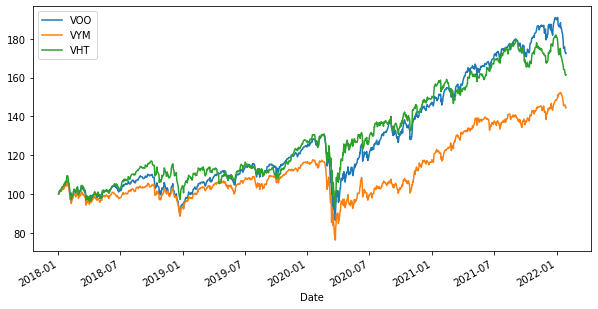

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

VOO    0.133052
VYM    0.089455
VHT    0.116720
dtype: float64

In [8]:
log_returns.cov() * 250

,VOO,VYM,VHT
VOO,0.044718,0.040428,0.038093
VYM,0.040428,0.041395,0.034621
VHT,0.038093,0.034621,0.040321


In [9]:
log_returns.corr()

,VOO,VYM,VHT
VOO,1.000000,0.939653,0.897087
VYM,0.939653,1.000000,0.847418
VHT,0.897087,0.847418,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [10]:
num_assets = len(assets)

pfolio_returns = []
pfolio_volatilities = []
w0 = []
w1 = []
w2 = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    w0.append(weights[0])
    w1.append(weights[1])
    w2.append(weights[2])
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
w0 = np.array(w0)
w1 = np.array(w1)
w2 = np.array(w2)

pfolio_returns, pfolio_volatilities, w0, w1, w2

(array([0.12212296, 0.1174457 , 0.12037093, 0.1151761 , 0.10965444,
        0.11415863, 0.11485655, 0.12298073, 0.11220071, 0.11371251,
        0.10310092, 0.1239526 , 0.10931074, 0.1060569 , 0.11424897,
        0.12480032, 0.11141688, 0.11473772, 0.11260661, 0.10223229,
        0.11623801, 0.12167317, 0.11630654, 0.10974723, 0.11463612,
        0.12564015, 0.12336832, 0.10900641, 0.11751241, 0.11204541,
        0.11038251, 0.12027192, 0.10220064, 0.11437827, 0.11156122,
        0.10592612, 0.10711545, 0.10692442, 0.10834618, 0.11038834,
        0.11811604, 0.10794869, 0.10328651, 0.10947429, 0.11458644,
        0.11092072, 0.1110524 , 0.1160997 , 0.12466332, 0.11110062,
        0.10503762, 0.11525945, 0.10662091, 0.11296488, 0.11557528,
        0.10579375, 0.10994521, 0.12266893, 0.10556919, 0.09321781,
        0.09712337, 0.11889335, 0.12625838, 0.12227393, 0.11696053,
        0.10745013, 0.10712341, 0.11143286, 0.11787803, 0.12296818,
        0.11282678, 0.11414331, 0.09933504, 0.10

In [11]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities, assets[0]: w0, assets[1]: w1, assets[2]: w2})

In [12]:
portfolios.head()

,Return,Volatility,VOO,VYM,VHT
0,0.122123,0.200643,0.526766,0.117370,0.355864
1,0.117446,0.198379,0.381578,0.201949,0.416473
2,0.120371,0.199901,0.481606,0.154577,0.363817
3,0.115176,0.197971,0.350032,0.266294,0.383673
4,0.109654,0.195539,0.150564,0.349331,0.500105


In [13]:
portfolios.tail()

,Return,Volatility,VOO,VYM,VHT
995,0.111274,0.197357,0.284306,0.370039,0.345655
996,0.113534,0.199212,0.392196,0.351792,0.256012
997,0.101684,0.195327,0.047125,0.579686,0.373189
998,0.103062,0.194901,0.046330,0.528676,0.424994
999,0.118329,0.197929,0.308791,0.125952,0.565257


In [14]:
portfolios.sort_values(by=['Volatility'])

,Return,Volatility,VOO,VYM,VHT
334,0.105281,0.194261,0.002249,0.420895,0.576856
101,0.105337,0.194264,0.001760,0.418537,0.579702
133,0.105576,0.194341,0.013634,0.416894,0.569473
55,0.105794,0.194385,0.019082,0.412173,0.568745
445,0.102979,0.194394,0.009904,0.509892,0.480204
...,...,...,...,...,...
852,0.125509,0.208045,0.820428,0.169064,0.010508
393,0.128784,0.208279,0.866947,0.076817,0.056236
623,0.128895,0.208531,0.875228,0.077700,0.047072
939,0.129984,0.208915,0.897849,0.051318,0.050833


Text(0, 0.5, 'Expected Return')

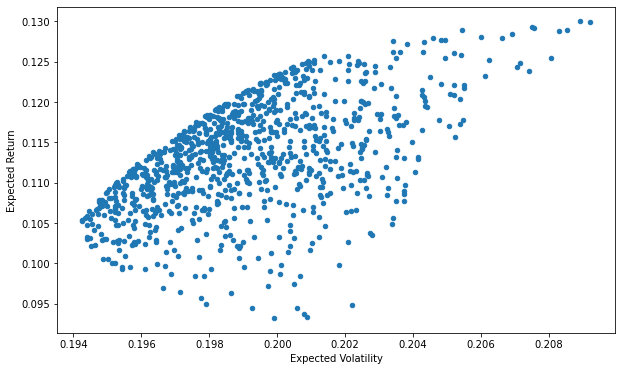

In [15]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [20]:
#generate path and name then export
path = ''\'
name = '_'.join(assets) + '.csv'
path_name = path + name 
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_1540/1634590303.py, line 2)